<h1><center>D212: Data Mining II</center></h1>
<br>
<center>Task 2: PCA</center>
<br>
<center></center>
<br>
<center>Department of Information Technology, Western Governor's University</center>
<br>
<center>Dr. Kesselly Kamara</center>
<br>
<center>July 22, 2024</center>
<br>
<br>
<br>
<br>

## A1. Research Question
For my research question for this paper, I have decided to center it around an idea I've already explored in a previous paper: predicting readmission using a KNN model. The dimensionality of the dataset for D209 wasn't especially high, so I was not worried about performing PCA at the time-- many datasets have hundreds of columns, whereas the WGU medical dataset contains 49. In addition, because the paper from D209 did not require PCA, I did not perform it, though it may have been helpful to have done so. Thus, with my research question, I will revisit the KNN model: Can one predict readmission effectively using a KNN model after PCA has been performed to reduce dataset dimensionality?

## A2. Analysis Goals

At the end of the day, the goal of this analysis is simply to predict readmission, though that is not quite the goal of this paper. The paper is limited to my performing PCA on the dataset, without going further into the actual prediction method-- a random forest. For the purpose of this section, though, I will pretend that I will go on to do a random forest classifier.

Speaking broadly, the goal is to attempt to help the hospital to which this data belongs reduce its readmission rate by first identifying the factors that contribute to a patient's readmission. Then, the hospital can use such information to come up with a proactive plan. Long term, the hospital could expect to see benefits such as improved efficiency and reduced costs, as mentioned above, which might also be communicated as a goal of this analysis to a board of executives. While readmission is but a subset of all hospital admissions, these are the most unwanted type of admission. Since readmissions are indeed a subset of admissions as a whole, I believe that this goal does still fall under Scenario 2 as given on the rubric page for this paper, which directs the analyst to analyze the "conditions leading to hospital admissions."

Another goal more specific to this paper is to use PCA to reduce the dimensionality of the dataset that will be fed to the KNN algorithm. Reducing the dataset to only what is needed to approximate the whole dataset may help us to understand our patient base along the way.

## B1. Explanation of PCA
Principle Component Analysis, otherwise known as PCA, reduces the dimensionality of a dataset in order to make storage and computation more efficient. It can be said that PCA removes the "noise" in the dataset, which can make trouble especially for supervised learning techniques like KNN. Dimensionality is reduced by finding a new set of variables that is smaller than the original set that still retains most of the dataset's information (GeeksforGeeks, 2024).

PCA transforms correlated variables into variables that are linearly uncorrelated with one another. These are principal components or "PCs." PCs capture data variance, where each PC represents a direction of variance and is uncorrelated to the PCs that were calculated before it. In mathematical terms, a PC is a normalized linear combination of the original features in the dataset. Thus, each PC is a composite of the original dataset's features, with each original feature having some weight in the composite feature. The first PC captures the dataset's maximum variance or the direction of highest variability, and each PC after it captures less and less variance (Avcontentteam, 2024).

All of the PCs generated are orthogonal to each other. In other words, they are at right angles to each other. Their orthogonal nature is a result of their being uncorrelated. This is easy to visualize on a dataset with 2 PCs, but harder to imagine in higher dimensions. In the image below, you can visualize how each PC represents a "direction of variance" in the data and the right angles at which PCs meet (Avcontentteam, 2024). PC 1 follows the diagonal spread of the data from the bottom left corner to the upper right corner, while PC 2 follows the more vertical spread of the data from bottom to top (at a slight left-leaning angle.)

![title](https://av-eks-blogoptimized.s3.amazonaws.com/2-1-e1458494877196.png)

Once PCA is performed, one can discard PCs that don't explain enough variability to be kept, thus reducing dataset dimensionality and allowing us to approximate the dataset with fewer features. PCs that explain more variance are more important than PCs that explain very little.

The expected outcome for PCA is to generate a number of principal components equal to the number of continuous variables present in the dataset, since PCA can only be done on continuous variables. One can use explained_variance_ratio_ to list the amount of variance explained by each PC, allowing the analyst to remove PCs that do not explain enough variance to be kept. Once the unimportant PCs are removed, the dimensionality is reduced.

## B2. PCA Assumptions

There are multiple assumptions for PCA, but as requested, I will highlight one. PCA assumes that there is correlation between the original features fed to it (A Guide to Principal Component Analysis (PCA) for Machine Learning, n.d.). This means that the variables (also known as columns or features,) are expected to have a relationship with one another, at least to some degree. In fact, if there is no correlation between the features, PCA will not be able to find PCs.

## C1. Variable Identification
I will perform PCA on the following *continuous* variables:
* Lat - Latitude of patient's home
* Lng - Longitude of patient's home
* Age - Age of patient (given in whole numbers, but I would argue someone can be 57.5 years old, making this variable continuous.)
* Income - Income of patient or primary insured
* VitD_levels - Patient's vitamin D level
* Initial_days - Length of hospitalization in days (decimal days allowed)
* TotalCharge - The average amount charged daily to the patient for their hospitalization
* Additional_charges - The average amount charged daily to the patient for non-typical services

I will omit the following quantitative variables from PCA because they are *discrete*:
* Population - Population can only ever be an integer value -- it makes no sense to say there is an "eighth of a person."
* Children - This is similar to population. It can only be an integer value. One does not have a "sixth of a child."
* Doc_visits - This also can only be an integer value. A doctor cannot perform half a visit-- that's still one visit.
* Full_meals_eaten - Because we are counting only full meals, this can only ever be an integer value.
* vitD_supp - This too can only ever be an integer value. It seems half doses (or even smaller doses) are not given.

## C2. Variable Standardization
Below you will find the code used to load the dataset, clean the dataset, and standardize the continuous variables mentioned above.

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#load csv into pandas dataframe. The CSV's first column is an index, so we let pandas know that too.
df=pd.read_csv('C:/Users/essay/Documents/D212 PA Dataset/medical_clean.csv', index_col = 0)

#visually inspect dataframe's datatypes and size to ensure it loaded properly.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to ensure data loaded as expected and do initial visual exploration
pd.set_option("display.max_columns", None)
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.691180,12742.589910,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.627161,16815.513600,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.499039,6930.572138,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.402860,8363.187290,3,3,2,3,3,3,4,2


In [4]:
#Clean datatypes up using code from D206 PA. 
#[In-Text Citation: (Nelson, 2023).]

# Convert Zip to string from integer.
df['Zip'] = df['Zip'].astype('str')
# Add leading zeros using zfill()
df['Zip'] = df['Zip'].str.zfill(5)
# Identify columns that can be converted all at once to category datatype using for loop.
category_cols = df[['Area', 'Marital', 'Initial_admin', 'Complication_risk', 'Services', 'ReAdmis',
                         'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                         'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]
# Will do Item# columns later since they require an order. Timezone needs a dict written, will do that later too.
for col in category_cols:
    df[col] = df[col].astype('category')
# Convert gender to category datatype.
df['Gender'] = df['Gender'].astype('category')
# Convert Overweight to category datatype.
df['Overweight'] = df['Overweight'].astype('category')
# Convert Anxiety to category datatype.
df['Anxiety'] = df['Anxiety'].astype('category')
# Convert Job to category datatype.
df['Job'] = df['Job'].astype('category')

# Create ordered categories for Item# variables. 8 is "least important" and 1 is "most important"
survey_scores = CategoricalDtype(categories=['8', '7', '6', '5', '4', '3', '2', '1'], ordered=True)
# Identify columns that need to become ordered categorical
ord_cat_cols = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]
# Create for loop to convert columns above to string (issues if not string first,) then ordered categorical datatype.
for col in ord_cat_cols:
    df[col] = df[col].astype('str')
    df[col] = df[col].astype(survey_scores)
# Write dictionary for option reduction for Timezone column
mapping_timezone = {'America/Puerto_Rico' : 'Atlantic',
          'America/New_York' : 'Eastern',
          'America/Detroit' : 'Eastern',
          'America/Indiana/Indianapolis' : 'Eastern',
          'America/Indiana/Vevay' : 'Eastern',
          'America/Indiana/Vincennes' : 'Eastern',
          'America/Kentucky/Louisville' : 'Eastern',
          'America/Toronto' : 'Eastern',
          'America/Indiana/Marengo' : 'Eastern',
          'America/Indiana/Winamac' : 'Eastern',
          'America/Chicago' : 'Central',
          'America/Menominee' : 'Central',
          'America/Indiana/Knox' : 'Central',
          'America/Indiana/Tell_City' : 'Central',
          'America/North_Dakota/Beulah' : 'Central',
          'America/North_Dakota/New_Salem' : 'Central',
          'America/Denver' : 'Mountain',
          'America/Boise' : 'Mountain',
          'America/Phoenix' : 'Mountain',
          'America/Los_Angeles' : 'Pacific',
          'America/Nome' : 'Alaskan',
          'America/Anchorage' : 'Alaskan',
          'America/Sitka' : 'Alaskan',
          'America/Yakutat' : 'Alaskan',
          'America/Adak' : 'Hawaiian',
          'Pacific/Honolulu' : 'Hawaiian'
          }
# Use dictionary to convert timezone options.
df.TimeZone.replace(mapping_timezone, inplace=True)
# Convert timezone to category datatype.
df['TimeZone'] = df['TimeZone'].astype('category')
# Round TotalCharge to 2 decimal places
df['TotalCharge'] = df.TotalCharge.round(2)
# Round Additional_charges to 2 decimal places
df['Additional_charges'] = df.Additional_charges.round(2)
#Re-inspect dataframe to see if changes took.
df.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  object  
 4   State               10000 non-null  object  
 5   County              10000 non-null  object  
 6   Zip                 10000 non-null  object  
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  TimeZone            10000 non-null  category
 12  Job                 10000 non-null  category
 13  Children            10000 non-null  int64   
 14  Age                 10000 non-null  int64   
 15  Income              10000 non-null  

In [5]:
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,Central,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,Central,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,Central,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,Central,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,Eastern,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.07,3716.53,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,Central,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.69,12742.59,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,Eastern,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.63,16815.51,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,Eastern,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.50,6930.57,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,Central,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.40,8363.19,3,3,2,3,3,3,4,2


In [6]:
# Isolate continuous columns from the other columns in the dataset.
df_pca = df[['Lat', 'Lng', 'Age', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']].copy()
# Create list of column names
col_names = list(df_pca.columns)
df_pca.head(5)

,Lat,Lng,Age,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,,,
1,34.34960,-86.72508,53,86575.93,19.141466,10.585770,3726.70,17939.40
2,30.84513,-85.22907,51,46805.99,18.940352,15.129562,4193.19,17613.00
3,43.54321,-96.63772,53,14370.14,18.057507,4.772177,2434.23,17505.19
4,43.89744,-93.51479,78,39741.49,16.576858,1.714879,2127.83,12993.44
5,37.59894,-76.88958,22,1209.56,17.439069,1.254807,2113.07,3716.53


In [7]:
# Standardize continuous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(X_scaled, columns=col_names)
df_scaled.head(5)
df_scaled.to_csv('pca_dataset_clean.csv', index=False)

## D1. Principal Component Matrix
Below is the code used to generate the matrix and the matrix output itself, which is called the loadings matrix in this case. The rows, titled as the column they represent, indicate how much each variable contributed to the PC, where each column represents a PC. For example, PC1 is heavily influenced by Initial_days and TotalCharge, while all of the other columns had very little influence on this PC, since their weights are near zero. Each column in the table can be read in this manner.

When we first run PCA, we will have as many PCs as we have continuous variables, which in this case, was 8.

In [8]:
# Set number of components to be returned equal to number of variables in continuous-only dataset.
pca = PCA(n_components = df_pca.shape[1], random_state= 7)
# Fit normalized dataset to PCA.
pca.fit(df_scaled)
# Create dataframe and name columns to better be able to read the PCA.
pca_print = pd.DataFrame(pca.transform(df_scaled), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
# Create dataframe to house PCA loadings and print them.
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index = df_scaled.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Lat,-0.013079,-0.008216,0.707443,0.010501,-0.093762,-0.700262,0.003858,0.001483
Lng,-0.010528,0.010934,-0.698601,-0.137959,-0.114966,-0.692410,-0.006681,-0.000357
Age,0.085809,0.701541,0.002471,0.017929,-0.000156,-0.003099,0.706716,0.026313
Income,-0.020516,-0.018690,-0.087846,0.725834,0.661202,-0.165777,0.002308,0.001312
VitD_levels,-0.001636,0.019146,0.059987,-0.673096,0.735289,-0.048152,-0.001932,-0.001552
Initial_days,0.701050,-0.091424,-0.000290,0.007525,0.008485,-0.014659,0.031677,-0.706274
TotalCharge,0.702184,-0.080868,-0.001272,0.005167,0.009042,-0.013262,-0.031469,0.706486
Additional_charges,0.086013,0.701455,0.012542,0.023631,0.000546,-0.000853,-0.706038,-0.036819


## D2. Determination of Number of Principal Components
Now, I will use a scree plot of the Kaiser Method to determine which PCs to keep and which to discard. The red line on this scree plot is the delineator between PCs to be kept and PCs to be discarded. If a PC's eigenvalue is equal to or greater than 1, I will keep it. If not, I will discard it. Eigenvalues represent the amount of variance explained by each PC, and any PC with an eigenvalue below 1 does not explain enough variance to be kept.

In the scree plot below, It appears 3 PCs have an eigenvalue above one, but I will display their eigenvalues in table format to be sure, since the graph gets a little flat and hard to read around the 3 to 4 PC mark. After doing so, it seems that four PCs have eigenvalues above 1. Thus, I will choose to keep the first four PCs.

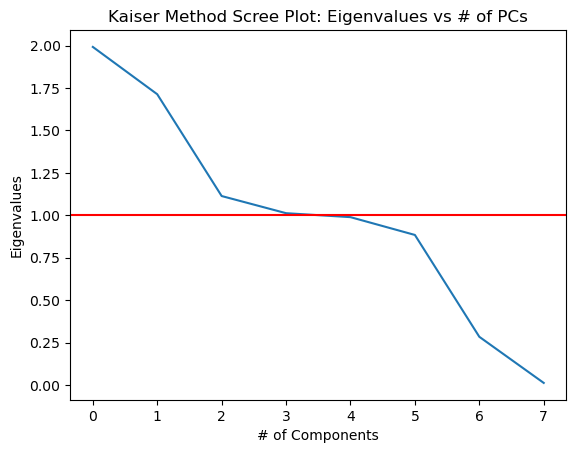

In [11]:
# Kaiser method, using eigenvalues to decide which PCs to keep and which to trash
# Create covariance matrix
covar_matrix = np.dot(df_scaled.T, df_scaled)/df_pca.shape[0]
# Generate eigenvalues
eigenvalues = [np.dot(eigenvector.T, np.dot(covar_matrix, eigenvector)) for eigenvector in pca.components_]
# Generate scree plot of eigenvalues, with a line at y = 1 to help figure out which PCs to keep.
plt.plot(eigenvalues)
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.title('Kaiser Method Scree Plot: Eigenvalues vs # of PCs')
plt.axhline(y = 1, color = 'red')
plt.show()

In [12]:
print(eigenvalues)

[1.9924466381851906, 1.7135101066505598, 1.1134323329799813, 1.0122954290957995, 0.9889596745038551, 0.8840060101735475, 0.2836326027178132, 0.01171720569324769]


## D3. Variance of Principal Components
The amount of variance explained by each of the retained PCs is given by the code output below. First, I use the initial PCA output to show the percent of variance explained by all 8 of the PCs. In the second code block, I reran PCA, but this time I specified that there should be only 4 PCs. If you compare the two code outputs, the amount of variance explained by the first four PCs is exactly the same. Re-running the PCA only truncated the list to the first four PCs, which I chose to keep.

Thus, it can be said that for the four PCs I will retain:
* PC1 explains about 25% of the variance.
* PC2 explains about 21% of the variance.
* PC3 explains about 14% of the variance.
* PC4 explains about 13% of the variance.

In [14]:
print(pca.explained_variance_ratio_)

[0.24905583 0.21418876 0.13917904 0.12653693 0.12361996 0.11050075
 0.03545408 0.00146465]


In [17]:
# Set number of components to be returned equal to number of variables in continuous-only dataset.
pca_final = PCA(n_components = 4, random_state= 7)
# Fit normalized dataset to PCA.
pca_final.fit(df_scaled)
pca_final_print = pd.DataFrame(pca_final.transform(df_scaled), columns = ['PC1', 'PC2', 'PC3', 'PC4'])
print(pca_final.explained_variance_ratio_)

[0.24905583 0.21418876 0.13917904 0.12653693]


## D4. Total Variance of Principal Components
Below you will find the total variance of all of the four retained PCs as code output, but I will also detail it here. In keeping the first 4 PCs, roughly 73% of the variance is explained.

In [20]:
print(f"Total Variance Explained: {round(sum(pca_final.explained_variance_ratio_ * 100), 3)} %")

Total Variance Explained: 72.896 %


## D5. Data Analysis Summary
The dataset's dimensionality was reduced by performing PCA on the 8 continuous variables in the full dataset that PCA can be performed on, reducing them to 4 instead of 8-- a reduction of half the continuous variables in the dataset. The loading matrix explained the contributions of each of the original 8 continuous variables on the 8 PCs generated, which each subsequently calculated PC explaining less variance than the last.

Then, I used the Kaiser Rule to retain only 4 PCs of the 8 generated, since only the first 4 of the PCs met or exceeded the eigenvalue threshold of 1. As aforementioned, if a PC's eigenvalue is less than 1, it is considered "unimportant" -- it doesn't explain enough variance -- and can be discarded. Only PCs with eigenvalues equal to or greater than one are "important" and are retained. The selection of eigenvalue = 1 as the threshold is not a random choice. An eigenvalue of 1 represents the variance of the standardized variables. In retaining only 4 of the 8 PCs, roughly 73% of the variance of the original 8 continuous variables was explained.

It is up to the analyst to decide whether or not this amount of explained variance is acceptable, and it is generally advisable to consider this within the business context. 73% is a decent amount of explained variance, but if it is of the utmost importance to have high accuracy in the KNN model we intend to use later in the analysis to predict readmission (or if it does not perform well on 4 PCs,) then one might argue that keeping 5 PCs (85% of variance explained) or 6 PCs (96% of variance explained) may be the better choice, especially since we are not working with a dataset with hundreds upon hundreds of columns. As such, not much difference is made in computational cost by keeping 4 versus 6 PCs.

## E. Code Sources

Nelson, M. (2023, August 8). *D206: Data Cleaning Performance Assessment.* Unpublished manuscript, Western Governors University.

## F. Content Sources

*A Guide to Principal Component Analysis (PCA) for Machine learning.* (n.d.). https://www.keboola.com/blog/pca-machine-learning

Avcontentteam. (2024, July 15). *What is Principal Component Analysis (PCA)?* Analytics Vidhya. https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/ 

GeeksforGeeks. (2024, July 25). *Principal Component Analysis (PCA).* GeeksforGeeks. https://www.geeksforgeeks.org/principal-component-analysis-pca/#